#Bank Customer Churn Prediction

## 1. Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
# To display plots inline within the notebook, rather than in a separate window or output cell
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None


## 2. Importing the datasets

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## 3. Exploring the data

In [6]:
r,c = df.shape
print("Number of customers in the bank =", r)
print("Number of churning parameters =", c)

Number of customers in the bank = 10000
Number of churning parameters = 11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
print("Are there any missing values in the dataser ?", df.isnull().values.any())

Are there any missing values in the dataser ? False


In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we moslty have categorical variables and 5 continuous variables

## Exploratory Data Analysis

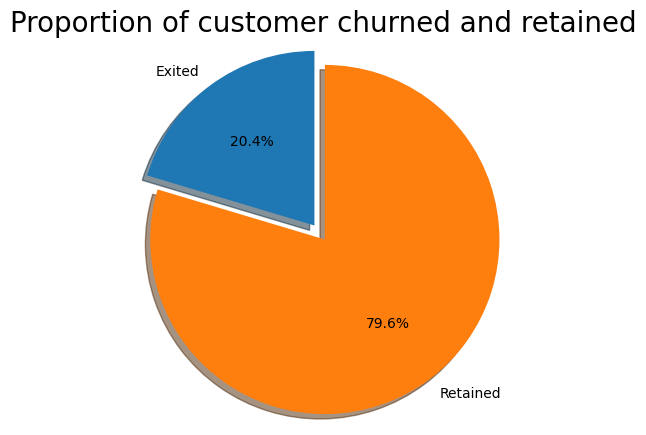

In [14]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]
explode = (0,0.1)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained

<Axes: xlabel='IsActiveMember', ylabel='count'>

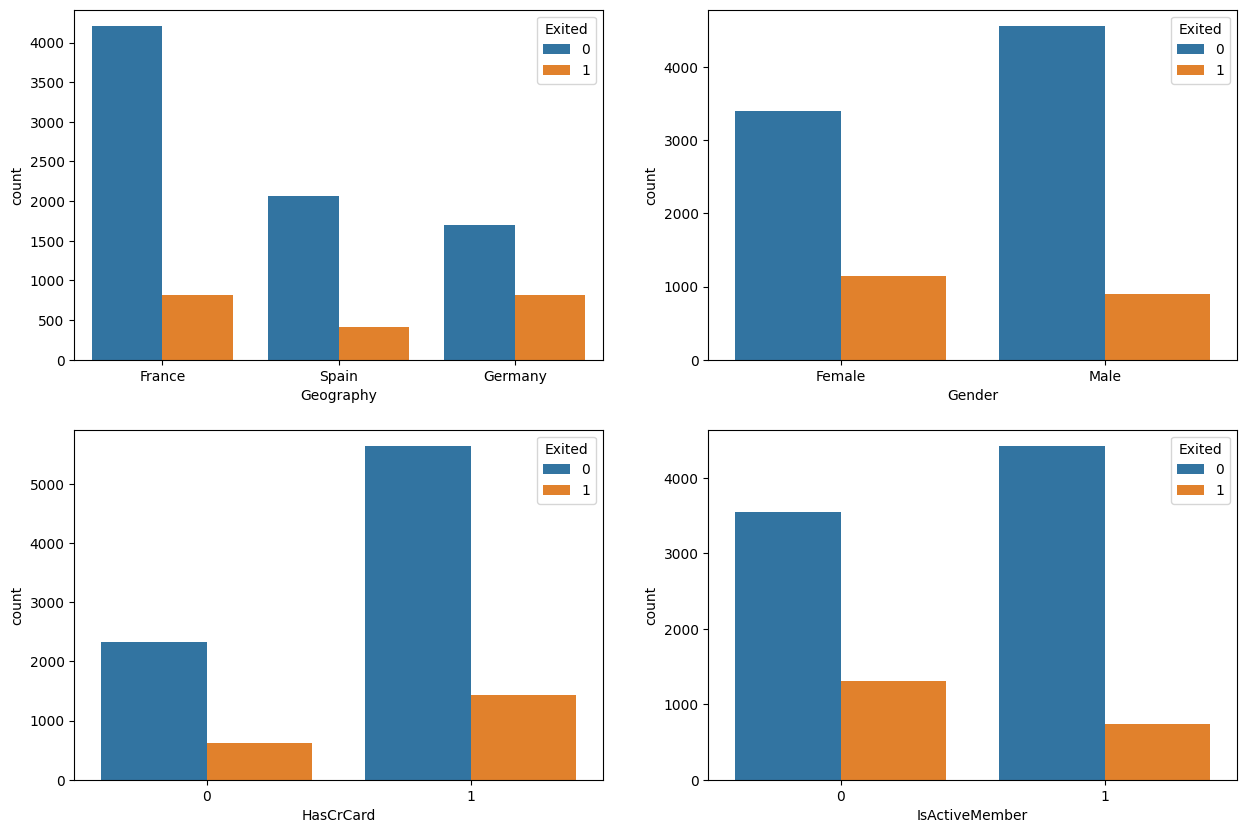

In [15]:
# Review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2,2, figsize=(15,10))
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])

We note the following:

* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

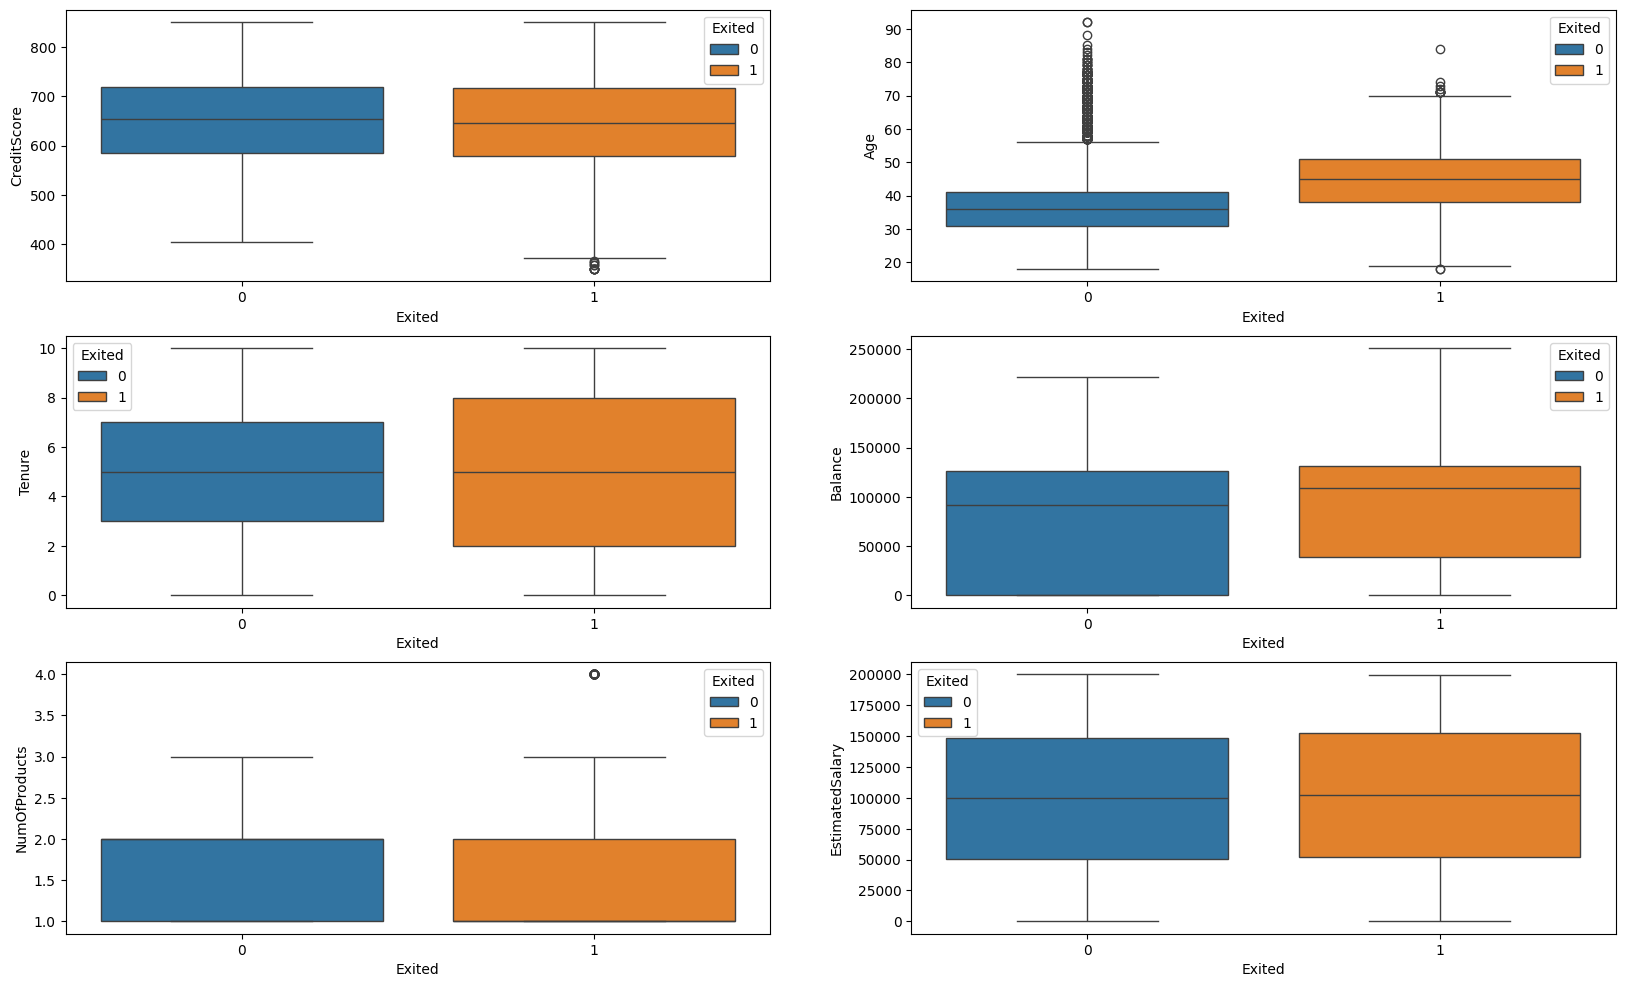

In [16]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3,2, figsize=(20,12))
sns.boxplot(y='CreditScore', x='Exited', hue = 'Exited', data=df, ax=axarr[0][0])
sns.boxplot(y='Age', x='Exited', hue = 'Exited', data=df, ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Exited', hue = 'Exited', data=df, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', hue = 'Exited', data=df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue = 'Exited', data=df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue = 'Exited', data=df, ax=axarr[2][1])

We note the following:

* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. * The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

## Feature engineering

(-1.0, 5.0)

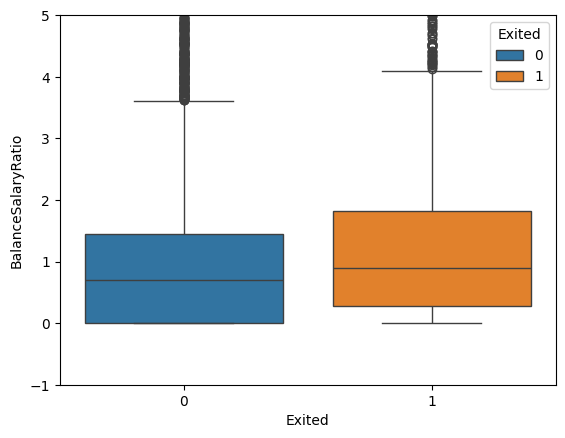

In [17]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio', x = 'Exited', hue = 'Exited', data=df)
plt.ylim(-1,5)

we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital

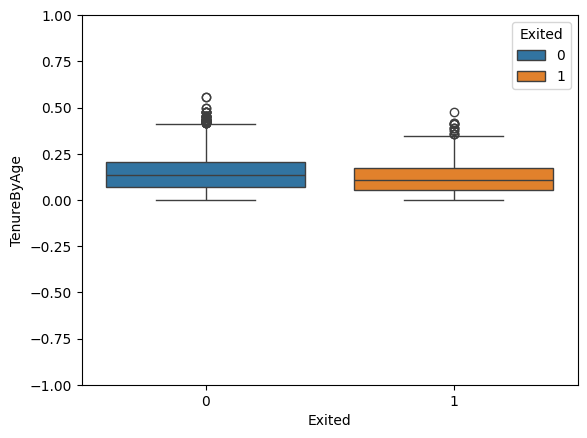

In [18]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df['TenureByAge'] = df.Tenure/df.Age
sns.boxplot(y='TenureByAge', x = 'Exited', hue = 'Exited', data = df)
plt.ylim(-1,1)
plt.show()

In [19]:
# To capture credit score given age to take into account credit behaviour visavis adult life
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


## Data prep for model fitting

In [20]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
categorical_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
df1 = df[['Exited'] + continuous_vars + categorical_vars]
df1.head()


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [22]:
''' For the one hot variables, we change 0 to -1 so that the models can capture a negative relation
where the attribute is inapplicable instead of 0 '''

df1.loc[df1.HasCrCard == 0, 'HasCrCard'] = -1
df1.loc[df1.IsActiveMember == 0, 'IsActiveMember'] = -1
df1.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [23]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    # Check if column exists before proceeding
    if i in df1.columns:
       if (df1[i].dtype == str or df1[i].dtype == object):
         for j in df1[i].unique():
            df1[i+'_'+j] = np.where(df1[i] == j,1,-1)
         remove.append(i)
df1 = df1.drop(remove, axis=1)
df1.head()

<ipython-input-23-73974848a7d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i+'_'+j] = np.where(df1[i] == j,1,-1)
<ipython-input-23-73974848a7d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i+'_'+j] = np.where(df1[i] == j,1,-1)
<ipython-input-23-73974848a7d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,-1,1,-1,1,-1


In [24]:
# minMax scaling the continuous variables
minVec = df1[continuous_vars].min().copy()
maxVec = df1[continuous_vars].max().copy()
df1[continuous_vars] = (df1[continuous_vars]-minVec)/(maxVec-minVec)
df1.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000,0.085714,0.235083,1,1,1,-1,-1,1,-1
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.000070,0.043902,0.237252,-1,1,-1,1,-1,1,-1
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,-1,1,-1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,-1,-1,1,-1,-1,1,-1
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.000150,0.083721,0.354739,1,1,-1,1,-1,1,-1


In [25]:
# Split Train, test data
df_train = df1.sample(frac=0.8, random_state=200)
df_test = df1.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


In [26]:
print('train data',df_train.columns)
print('test data',df_test.columns)

train data Index(['Exited', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember',
       'Geography_France', 'Geography_Spain', 'Geography_Germany',
       'Gender_Female', 'Gender_Male'],
      dtype='object')
test data Index(['Exited', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember',
       'Geography_France', 'Geography_Spain', 'Geography_Germany',
       'Gender_Female', 'Gender_Male'],
      dtype='object')


In [27]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Exited,8000.0,0.205875,0.404365,0.000000,0.000000,0.000000,0.000000,1.000000
CreditScore,8000.0,0.599477,0.194722,0.000000,0.466000,0.602000,0.734000,1.000000
Age,8000.0,0.283500,0.141861,0.000000,0.189189,0.256757,0.351351,1.000000
Tenure,8000.0,0.503487,0.289775,0.000000,0.300000,0.500000,0.800000,1.000000
Balance,8000.0,0.303043,0.248641,0.000000,0.000000,0.386144,0.507774,1.000000
NumOfProducts,8000.0,0.175792,0.192510,0.000000,0.000000,0.000000,0.333333,1.000000
EstimatedSalary,8000.0,0.499532,0.287893,0.000392,0.252845,0.497598,0.745591,1.000000
BalanceSalaryRatio,8000.0,0.000273,0.002201,0.000000,0.000000,0.000070,0.000142,0.124931
TenureByAge,8000.0,0.249137,0.161473,0.000000,0.116129,0.234783,0.360000,1.000000
CreditScoreGivenAge,8000.0,0.308663,0.128185,0.000000,0.218752,0.294250,0.382746,1.000000


In [29]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Exited,2000.0,0.195000,0.396300,0.000000,0.000000,0.000000,0.000000,1.000000
CreditScore,2000.0,0.607380,0.187452,0.046000,0.472000,0.610000,0.736500,1.000000
Age,2000.0,0.279635,0.141184,0.000000,0.189189,0.256757,0.351351,1.000000
Tenure,2000.0,0.492450,0.286878,0.000000,0.200000,0.500000,0.700000,1.000000
Balance,2000.0,0.312070,0.248849,0.000000,0.000000,0.395592,0.511814,0.848066
NumOfProducts,2000.0,0.180500,0.199292,0.000000,0.000000,0.000000,0.333333,1.000000
EstimatedSalary,2000.0,0.504077,0.286369,0.000000,0.262806,0.512733,0.747694,0.999325
BalanceSalaryRatio,2000.0,0.000735,0.022394,0.000000,0.000000,0.000072,0.000145,1.000000
TenureByAge,2000.0,0.244880,0.159647,0.000000,0.116129,0.230278,0.351220,0.857143
CreditScoreGivenAge,2000.0,0.313844,0.126760,0.046858,0.226174,0.300462,0.384063,0.949773


## 6. Model fitting and selection
For the model fitting, I will try out the following

* Logistic regression in the primal space and with different kernels
* SVM in the primal and with different Kernels
* Ensemble models

In [30]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [31]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

In [39]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None,
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [40]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None,
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Exited)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [41]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [42]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [46]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [47]:
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [48]:
print(classification_report(df_train.Exited,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.45      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.74      8000
weighted avg       0.85      0.86      0.85      8000



In [49]:
print(classification_report(df_train.Exited,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [50]:
print(classification_report(df_train.Exited,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [51]:
print(classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.88      0.52      0.65      1647

    accuracy                           0.89      8000
   macro avg       0.88      0.75      0.79      8000
weighted avg       0.89      0.89      0.87      8000



In [55]:
y = df_train.Exited
X = df_train.loc[:, df_train.columns != 'Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])

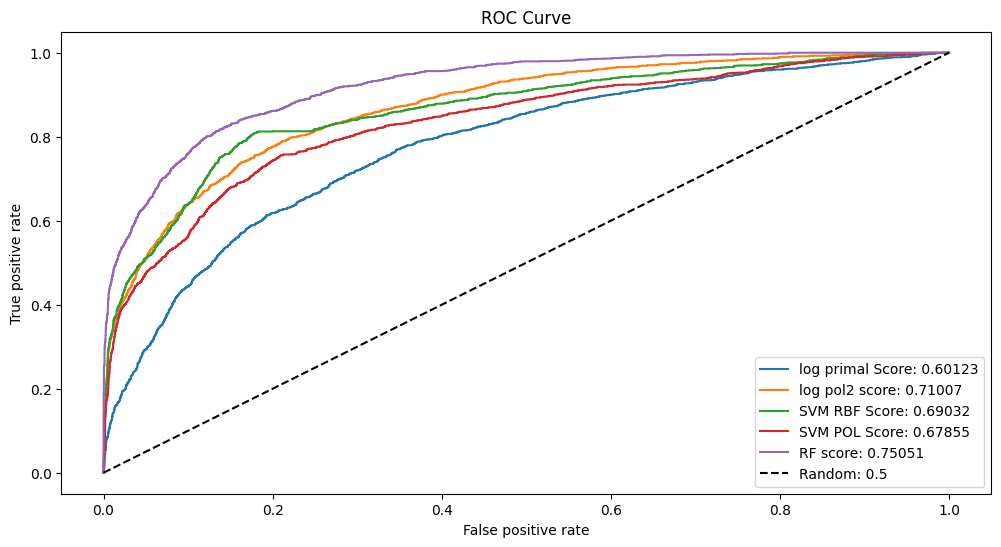

In [56]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.


Given that in the data we only had 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.


From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

Test model prediction accuracy on test data

In [58]:
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

(2000, 17)

In [59]:
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1610
           1       0.76      0.46      0.57       390

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



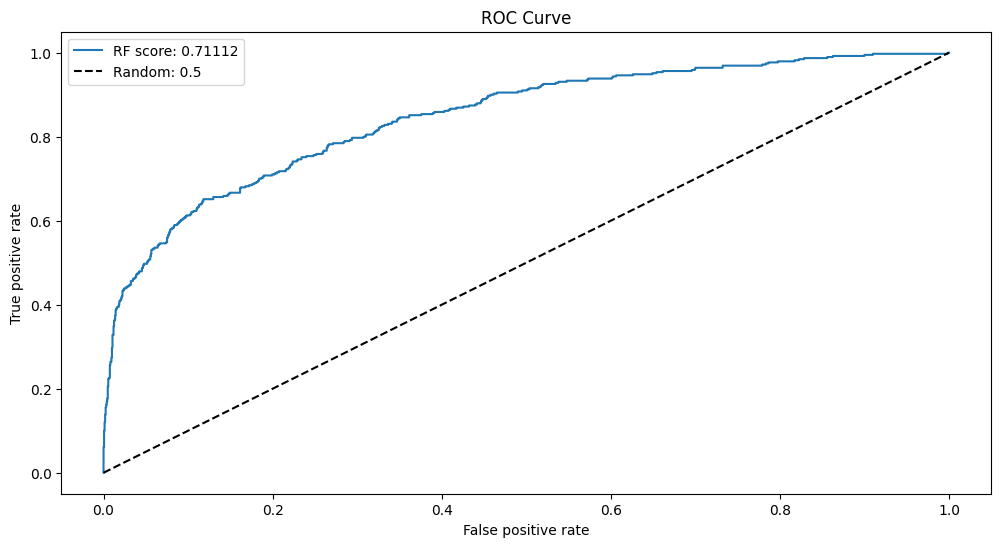

In [60]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

## 7. Conclusion

The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time.